# Background
The "Supermarket Customers.csv" dataset provides comprehensive information about supermarket customers. It includes demographic details such as age, education, marital status, income, and household composition (number of children/teens). Additionally, it captures shopping behavior, including spending on various product categories, preferred purchasing channels, and responses to marketing promotions. This dataset was gathered by the supermarket to gain a deeper understanding of customer preferences and behaviors.

## Problem Statement
The goal of this analysis is to determine how customer demographic factors—such as age, education, marital status, income, and household composition (number of children/teens)—influence their shopping behavior at the supermarket. Specifically, we aim to understand how these characteristics affect spending across product categories like wine, fruits, meat, fish, sweets, and gold.

This analysis will be used to provide meaningful insights that can help in various aspects of supermarket operations, including:

* Customer Segmentation: Identifying distinct customer segments based on their demographic attributes and purchasing behavior.
* Focused Marketing Strategies: Developing tailored marketing campaigns to appeal to specific customer groups, enhancing the effectiveness of promotions.
* Product Development and Offerings: Recommending improvements or changes to product offerings that match customer preferences, driving increased satisfaction and sales.
* Actionable Stakeholder Recommendations: Delivering clear, data-driven recommendations for stakeholders to make informed decisions regarding marketing, inventory management, and customer engagement strategies.

## Audience

1. Supermarket Management
2. Marketing and Sales Team
3. Product (Inventory management) and Merchandising Team

## Objectives
1. Understand how customer demographic characteristics (age, education, marital status, income, household composition) influence their shopping behavior, particularly in terms of spending across various product categories.
2. Identify the most profitable customer segments and determine effective marketing strategies for each segment.
3. Optimize inventory management and merchandising based on customer preferences and shopping behavior.


# Data
To achieve the objectives mentioned above, we will analyze the data collected by the company. The dataset can be accessed [here](https://drive.google.com/file/d/1lGG2nBWS5lVEpmmBZp2r0Koesa4t6c7W/view?usp=drive_open). 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import warnings
warnings.filterwarnings("ignore")

This dataset contains information related to customer demographics, products, promotions, and locations. The supermarket_customers dataset consists of 29 columns, which are:  

#People
* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

#Products
* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

#Promotion
* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if the customer accepted the offer in the last campaign, 0 otherwise
* Z_CostContact: unknown, no information about this column on the guidance
* Z_Revenue: unknown, no information about this column on the guidance	

#Place
* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalog
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to the company’s website in the last month


Below are the top 5 and bottom 5 rows of the supermarket_customers dataset.

In [4]:
df=pd.read_csv('supermarket_customers.csv', sep='\t')
display(df.head(),df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


## Data Understanding and Cleaning
Before diving into the analysis, we need to further explore the dataset in the data understanding phase. This process helps us identify any anomalies present in the dataset, which will then be addressed during the data cleaning phase. Each anomaly will be handled with appropriate justification, based on either domain knowledge or statistical analysis.

First, let’s take a look at the general information of the supermarket_customers dataset.

In [5]:
print(f'The number of rows and columns in the dataset df is {df.shape}')
df.info()

The number of rows and columns in the dataset df is (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240

In [6]:
display(df.describe(), df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


Collect information about the uniqueness of data in each column of the DataFrame in a summary table

In [7]:
pd.set_option('display.max_colwidth', None)
# data unique in each column
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 11-04-2013, 01-12-2013, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 08-05-2014, 10-12-2013, 24-09-2013, 02-02-2013, 07-12-2012, 02-11-2013, 10-11-2012, 25-06-2014, ...]"
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 14, 52, 93, 50, 60, 66, 97, 62, 6, 33, 67, 22, 71, 7]"
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 81, 123, 48, 826, 245, 650, 12, 510, 3

In general, we can see that:

* The supermarket_customers dataset has 29 columns and 2240 rows.
* The column with missing values is Income, which has 1.07% of its values missing, represented by NaN.
* The Dt_Customer column contains 663 unique values and is of type object. Based on its description, this column should be converted to datetime type.
* The Education column has 5 unique categories, and the Marital_Status column has 8 categories. Some of these categories might be redundant and can be optimized.

We have reviewed the dataset and are ready to begin the data wrangling process. The following steps will be taken:

* Handle Missing Values: Address any missing data appropriately.
* Check and Remove Duplicates: Drop duplicate rows, if present.
* Correct Data Types: Convert Dt_Customer to datetime format.
* Handle Outliers: Remove, keep, or transform outliers as needed.
* Standardize Categorical Values: Clean and encode columns like Marital_Status and Education.
* Data Consistency Checks: Ensure that the values in certain columns make sense (e.g., no negative values for spending columns).
* Create New Features: Consider creating useful features, such as:
Total Spending: Sum all spending columns to get a Total_Spending metric.
Customer Lifetime: Calculate the number of days since the customer joined by subtracting Dt_Customer from today’s da
* Feature Engineering: Create new features like Customer_Lifetime and Total_Spending.

### Missing Value

In [8]:
# persentase of missing value in each column
df.isna().sum()/df.shape[0]*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

<Axes: >

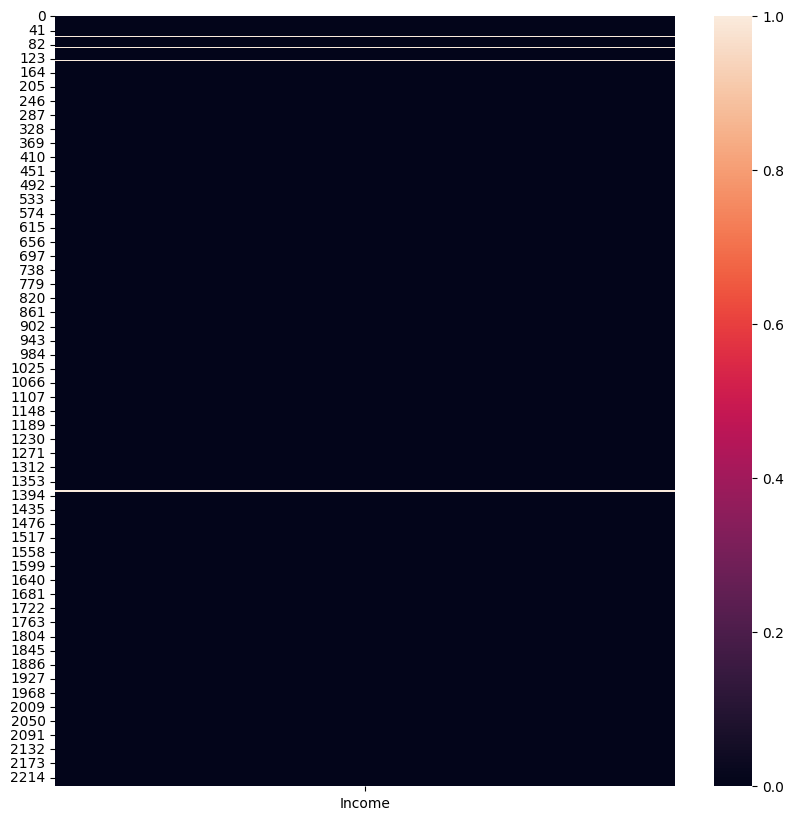

In [9]:
# distribution of missing values in the data
plt.figure(figsize=(10,10))
sns.heatmap(df[['Income']].isna())

<Axes: ylabel='None'>

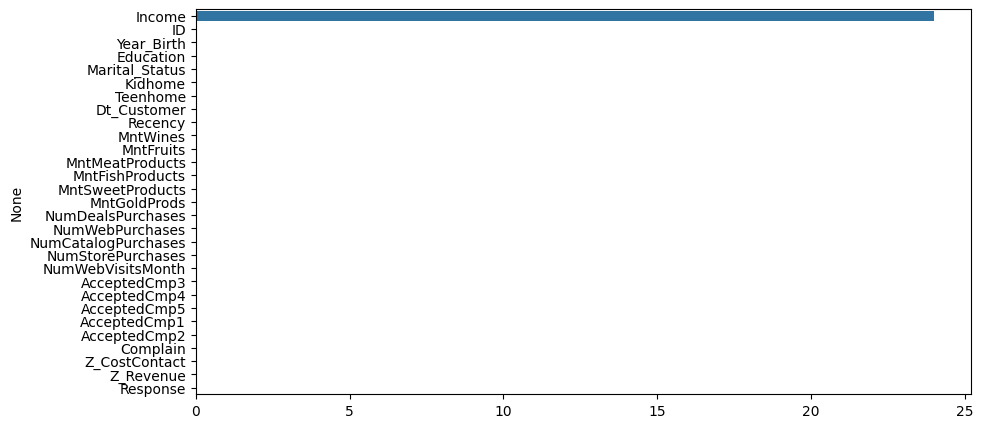

In [10]:
# distribution of missing values in the data
plt.figure(figsize=(10, 5))
sns.barplot(y=df.isnull().sum().sort_values(ascending=False).index, x=df.isnull().sum().sort_values(ascending=False).values)

Based on the visualization:

* The missing values are present only in the Income column.
There are relatively few missing values distributed across the dataset, with only about 1% of the rows showing missing values.
The rows with missing values are spread out, with no noticeable clusters, indicating that the missing data does not follow any specific pattern.


Handling the *missing value*:
* Since only 1.07% of the Income values are missing, I could choose to drop these rows entirely. This approach is simple and avoids potential imputation bias.
However, dropping rows should only be done if the dataset is large enough and the missing data is small enough that it won't affect the quality of your analysis.
* **Given that the Income column has numerical data, and there are outliers in the dataset, using the median is the best approach.**
The median is less sensitive to outliers and provides a robust central tendency value, making it a good choice when the data contains extreme values.

In [11]:
# filling the missing value with the median value
median_income = df['Income'].median()
df['Income'].fillna(median_income, inplace=True)

# to check if there are any missing values left in the dataset
print(df.isnull().sum())


ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


Check and Remove Duplicates, if any

In [12]:
# check for duplicates in the dataset
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


Correcting the Data Type for Dt_Customer:

* The Dt_Customer column contains the customer join date, but it is currently stored as a string (object).
* It should be converted to a datetime type to enable easier analysis, such as calculating customer tenure or aggregating data by time.
* Converting it to a datetime format allows for more efficient time-based analysis.
* This also makes it possible to calculate customer tenure and analyze the distribution of join dates.

In [13]:
# convert 'Dt_Customer' to datetime type
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')


print(df['Dt_Customer'].head())

0   2012-09-04
1   2014-03-08
2   2013-08-21
3   2014-02-10
4   2014-01-19
Name: Dt_Customer, dtype: datetime64[ns]


In [14]:
df['Year'] = df['Dt_Customer'].dt.year

In [15]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,2012
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,2014
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,2013
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,2014
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,0,3,11,0,2013
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,0,1,0,0,3,11,0,2014
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,1,0,0,0,0,3,11,0,2014
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,0,3,11,0,2014


In [16]:
df['Year'].describe()

count    2240.000000
mean     2013.028125
std         0.684554
min      2012.000000
25%      2013.000000
50%      2013.000000
75%      2013.000000
max      2014.000000
Name: Year, dtype: float64

In [17]:
df['Dt_Customer'].describe()

count                             2240
mean     2013-07-10 10:01:42.857142784
min                2012-07-30 00:00:00
25%                2013-01-16 00:00:00
50%                2013-07-08 12:00:00
75%                2013-12-30 06:00:00
max                2014-06-29 00:00:00
Name: Dt_Customer, dtype: object

In [18]:
df['Income'].describe()

count      2240.000000
mean      52237.975446
std       25037.955891
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

Let's assume that the current year (or the point of reference for analysis) is 2014. This is because the latest data recorded is from 2014, which implies that the analysis should be grounded in that year for consistency and relevance.



In [19]:
df['Age'] =  2014 - df['Year_Birth']

In [20]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,2012,57
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,2014,60
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,2013,49
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,2014,30
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,2014,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,3,11,0,2013,47
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,1,0,0,3,11,0,2014,68
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,1,0,0,0,0,3,11,0,2014,33
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,3,11,0,2014,58


In [21]:
df['Age'].describe()

count    2240.000000
mean       45.194196
std        11.984069
min        18.000000
25%        37.000000
50%        44.000000
75%        55.000000
max       121.000000
Name: Age, dtype: float64

Handling Outliers

I’m treating outliers in this analysis to get a clearer view of typical spending patterns. By addressing these extreme values, the focus shifts to trends that represent most customers, helping me spot patterns that are more common and reliable.



In [22]:
# Strip whitespace from all column names
df.columns.str.strip()

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Year', 'Age'],
      dtype='object')

In [23]:
print(df.columns.tolist())

['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Year', 'Age']


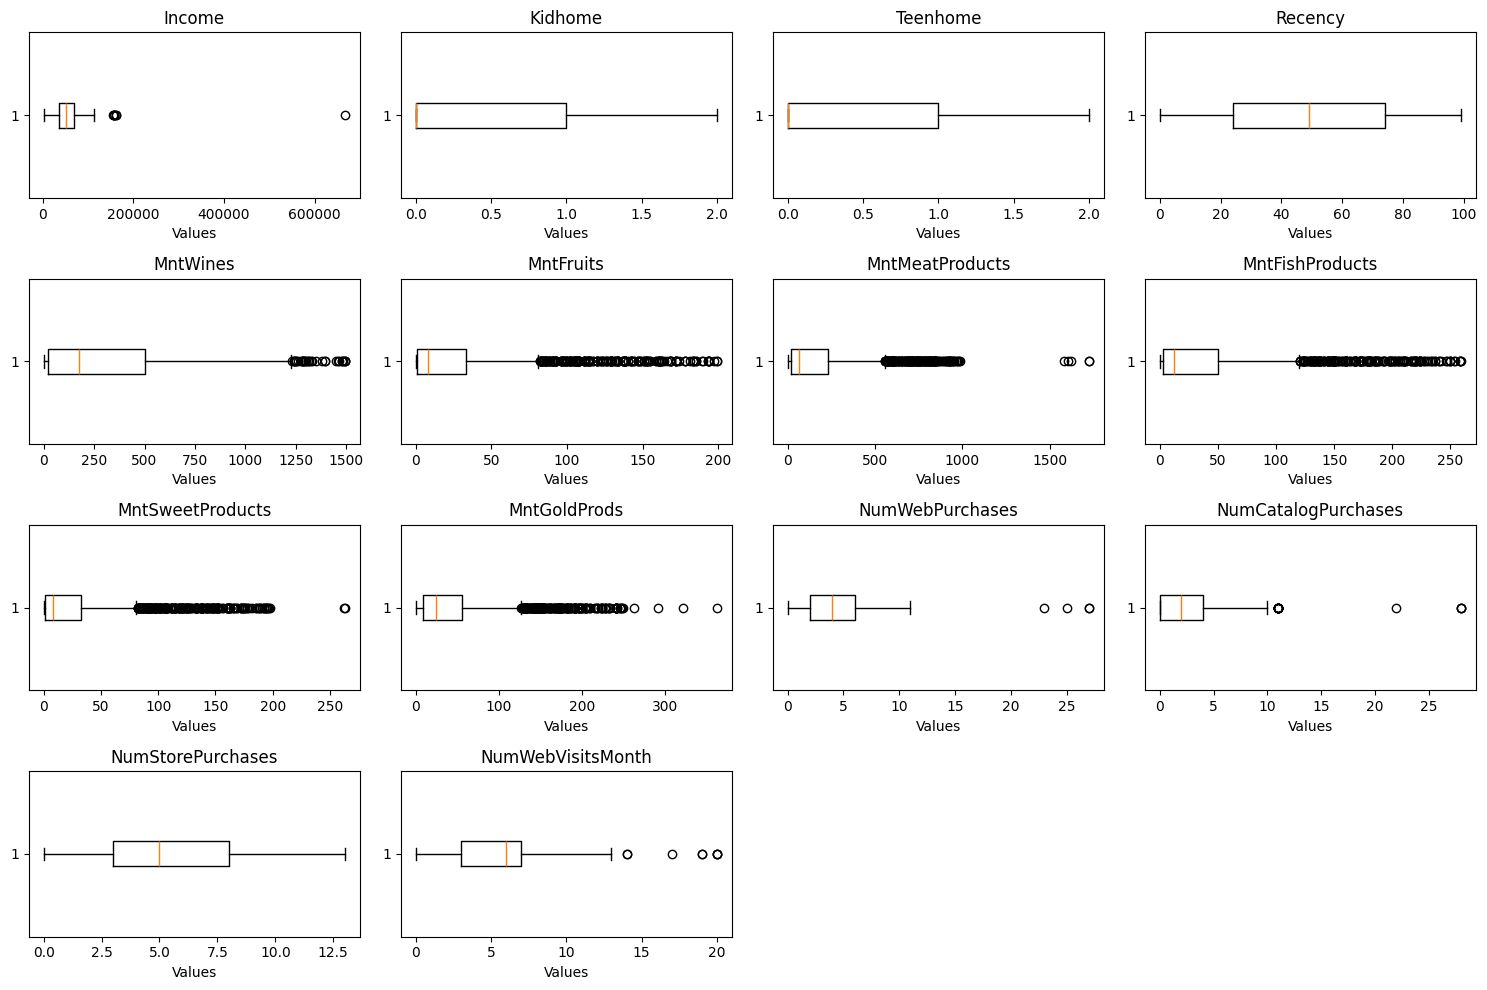

In [24]:
# List of columns to check for outliers
columns_to_check = [
    'Income', 'Kidhome', 'Teenhome', 'Recency',
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases',
    'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'
]

# Plot boxplots for each column
plt.figure(figsize=(15, 10))  # Set the figure size

for i, column in enumerate(columns_to_check, 1):
    plt.subplot(4, 4, i)  # Create a subplot grid (adjust as needed)
    plt.boxplot(df[column].dropna(), vert=False)  # Plot boxplot horizontally
    plt.title(column)  # Set the title as the column name
    plt.xlabel("Values")  # Label for x-axis

plt.tight_layout()  # Adjust layout to fit subplots
plt.show()

* Income: The box plot for income is right-skewed (the tail extends to the right with high outliers). This means that while most customers fall within a certain income range, there are a few wealthier customers who earn significantly more. These high earners are likely driving the right tail of the distribution.

* Kidhome: This box plot looks fairly normal, with no strong skew. Most households have a small number of children, typically 0, 1, or 2, and there aren’t extreme values that stand out. This indicates that family size is relatively consistent across customers.

* Teenhome: Similar to Kidhome, the distribution is also normal with no noticeable skew. Most households have either no teenagers or just one, showing a fairly balanced spread without extreme values.

* Recency: This column has a normal distribution as well, with a balanced box and whiskers, showing that recency of purchase is fairly evenly distributed. Customers' last purchase days are spread across a typical range without strong extremes, suggesting that people are generally making purchases at regular intervals.

* MntWines: The box plot is right-skewed, with several high outliers. This indicates that most customers spend a modest amount on wine, but a few outliers (likely wine enthusiasts or those with higher budgets) spend much more. The skew tells us there’s a small group with a high preference for wine.

* MntFruits: Similar to wine, this is also right-skewed with high outliers, though the overall spending on fruits is lower. The skew suggests that while fruit spending is generally modest, a few customers spend a lot on fruits, possibly indicating health-conscious buyers or those who prioritize fresh produce.

* MntMeatProducts: Another right-skewed distribution, with a handful of customers spending significantly on meat. This could represent larger households or meat enthusiasts with higher meat consumption.

* MntFishProducts: Right-skewed as well, with some high outliers. This suggests that while most customers spend moderately on fish, a few spend a lot, likely due to dietary preferences or an emphasis on seafood in their meals.

* MntSweetProducts: The box plot for sweets is right-skewed too, with some high spenders standing out. These might be customers with a strong preference for sweets, buying in higher quantities or more frequently than others.

* MntGoldProds: This distribution is right-skewed, with some outliers who spend a lot on gold products. These outliers likely represent a wealthier subset of customers interested in luxury or specialty items.

* NumWebPurchases: Slightly right-skewed, with a few customers making more online purchases than others. This suggests that while most customers use the website moderately, there’s a subset of highly engaged online shoppers.

* NumCatalogPurchases: This column is right-skewed as well, with a few outliers making frequent purchases via catalog. These could be customers who prefer the catalog experience or are accustomed to offline shopping.

* NumStorePurchases: This box plot is relatively normal, with most values falling within a consistent range and no major skew. This indicates that in-store shopping habits are fairly balanced across the customer base.

* NumWebVisitsMonth: The distribution is right-skewed, with some customers visiting the website far more frequently than others. This skew suggests that a small group of customers is very engaged with the site, possibly checking it frequently for deals, product updates, or other reasons.

Summary
In general:

Many columns are right-skewed, indicating that most customers fall within a typical range, but there are a few who spend or engage at much higher levels (e.g., in wine, meat, or luxury purchases).
Normal distributions in columns like Kidhome, Teenhome, and NumStorePurchases show consistency in family size and in-store shopping behavior.
Right-skewness in many of these spending and engagement columns suggests that certain customers have unique, high-level behaviors that set them apart. These outliers can be valuable for targeted marketing and segmentation to meet the needs of higher-spending or more engaged customers.

In [25]:
# List of columns to remove outliers from
key_columns = ['Income', 'MntWines', 'MntGoldProds', 'MntMeatProducts']

# Function to remove outliers using IQR method
def remove_outliers(df, column, factor=2.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Copy of the full original dataset to work with
df_clean = df.copy()

# Apply outlier removal to each key column
for column in key_columns:
    df_clean = remove_outliers(df_clean, column, factor=2.5)

# Now `df_clean` should retain all columns and have outliers removed only in the selected columns




Removing outliers from the key columns (Income, MntWines, MntGoldProds, and MntMeatProducts),  filtered out about 8% of the data (180 rows out of 2240). this is to reduce the skew in those columns and provide a cleaner dataset while retaining the majority of the data for analysis or modeling.

How the data looks after outlier removal versus before:

Income
Before: The income data was heavily skewed by a few very high earners, which pulled the distribution to the right. This made it harder to see the typical income range of most customers because the high-income outliers distorted the overall trend.

After: Now, with the most extreme income outliers removed, I can see a more balanced view of typical income levels. The remaining single outlier doesn’t skew the data too much, so the central box more accurately reflects where most customers’ incomes lie.

MntWines (Wine Spending)

Before: Wine spending had a few customers who spent significantly more than others. These high outliers stretched the box plot and made it challenging to understand the usual spending behavior.

After: With those extreme outliers removed, the box plot is now narrower, and the spending range is more concentrated. Now, the data shows a more typical spending pattern on wine, with only one mild outlier left, allowing me to see the average customer’s behavior more clearly.

MntGoldProds (Gold Product Spending)

Before: In the gold spending data, a handful of high spenders stood out, making it hard to interpret the usual spending. These outliers gave the impression that luxury spending was higher overall than it actually was for most customers.

After: Removing the extreme outliers has simplified the plot, giving a more realistic view of gold spending. The box plot is now compact, showing that most customers spend modestly on gold. The single remaining outlier represents a unique but not extreme preference for luxury items.

MntMeatProducts (Meat Spending)

Before: There was more spread in meat spending due to some high spenders, which made it hard to see the usual pattern. These outliers stretched the distribution, masking typical spending levels.

After: With the biggest outliers removed, the plot for meat spending now looks cleaner and more centered around typical values. The data still shows a range of spending, but it’s easier to identify the average behavior. The single outlier that remains gives a touch of diversity without overwhelming the main trend.

Overall Comparison

Before: The presence of extreme outliers in each category pulled the distributions, made the data look more spread out, and made it challenging to get a clear picture of typical spending patterns.

After: With the most extreme outliers removed, each box plot now highlights the usual range for each category. The remaining outliers are less extreme and show a natural variation among customers without skewing the average trends.
In summary, removing the extreme outliers has created a cleaner, more accurate view of customer behavior. Now, I can see a true reflection of average spending patterns, while still capturing some diversity in the data with a few mild outliers. This balanced dataset is more reliable for analysis and decision-making.

In [26]:
pd.set_option('display.max_colwidth', None)
# data unique in each column
listItem = []
for col in df_clean.columns :
    listItem.append( [col, df_clean[col].nunique(), df_clean[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,ID,2060,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 2278, 9360, 1993, 4047, 1409, 7892, 2404, 9422, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 1331, 9381, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 3037, 1473, 1016, 4518, 9370, 8908, 8373, 7533, 2683, 3629, 10991, ...]"
1,Year_Birth,58,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1982, 1949, 1951, 1969, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1977, 1978, 1966, 1988, 1948, 1979, 1958, 1960, 1972, 1945, 1964, 1991, 1962, 1953, 1961, 1956, 1955, 1900, 1986, 1893, 1947, 1992, 1993, 1994, 1941, 1944, 1990, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1816,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, 51381.5, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 33812.0, 37040.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 35790.0, 66373.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, 68126.0, 57288.0, 86037.0, 43974.0, 50785.0, 36550.0, 30753.0, 21918.0, 56129.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,653,"[2012-09-04 00:00:00, 2014-03-08 00:00:00, 2013-08-21 00:00:00, 2014-02-10 00:00:00, 2014-01-19 00:00:00, 2013-09-09 00:00:00, 2012-11-13 00:00:00, 2013-05-08 00:00:00, 2013-06-06 00:00:00, 2014-03-13 00:00:00, 2013-11-15 00:00:00, 2012-10-10 00:00:00, 2012-11-24 00:00:00, 2012-12-24 00:00:00, 2012-08-31 00:00:00, 2012-11-03 00:00:00, 2012-08-08 00:00:00, 2012-12-23 00:00:00, 2014-01-11 00:00:00, 2013-03-18 00:00:00, 2013-01-02 00:00:00, 2013-05-27 00:00:00, 2013-05-31 00:00:00, 2014-05-22 00:00:00, 2013-05-11 00:00:00, 2012-10-29 00:00:00, 2013-02-20 00:00:00, 2013-08-29 00:00:00, 2013-12-31 00:00:00, 2013-09-02 00:00:00, 2014-02-11 00:00:00, 2013-02-01 00:00:00, 2013-04-29 00:00:00, 2013-03-12 00:00:00, 2013-11-05 00:00:00, 2013-10-02 00:00:00, 2014-06-28 00:00:00, 2012-11-09 00:00:00, 2013-05-24 00:00:00, 2014-01-01 00:00:00, 2012-11-08 00:00:00, 2014-05-12 00:00:00, 2013-06-12 00:00:00, 2013-04-02 00:00:00, 2014-04-28 00:00:00, 2013-06-17 00:00:00, 2014-03-03 00:00:00, 2013-07-04 00:00:00, 2012-09-07 00:00:00, 2013-02-18 00:00:00, 2013-06-11 00:00:00, 2013-12-06 00:00:00, 2013-05-21 00:00:00, 2014-05-11 00:00:00, 2014-03-19 00:00:00, 2013-09-27 00:00:00, 2013-04-08 00:00:00, 2012-09-11 00:00:00, 2012-09-14 00:00:00, 2013-03-17 00:00:00, 2013-04-05 00:00:00, 2014-04-30 00:00:00, 2012-12-19 00:00:00, 2013-09-04 00:00:00, 2012-08-29 00:00:00, 2013-06-23 00:00:00, 2013-07-03 00:00:00, 2014-02-25 00:00:00, 2013-08-11 00:00:00, 2013-07-16 00:00:00, 2014-05-28 00:00:00, 2014-01-21 00:00:00, 2012-11-19 00:00:00, 2014-05-27 00:00:00, 2013-11-23 00:00:00, 2014-03-23 00:00:00, 2014-05-24 00:00:00, 2012-11-22 00:00:00, 2013-04-11 00:00:00, 2013-06-20 00:00:00, 2013-07-23 00:00:00, 2014-03-30 00:00:00, 2013-04-20 00:00:00, 2013-05-17 00:00:00, 2014-05-08 00:00:00, 2013-12-10 00:00:00, 2013-09-24 00:00:00, 2013-02

### Standardize Categorical Values

Education and Marital_Status

Before proceeding further, let's correct any inconsistencies in the Education and Marital_Status columns. Specifically, we will replace values such as Absurd and YOLO in the Marital_Status column with appropriate or standardized categories.

* The Marital_Status column contains inconsistent or unclear categories like 'Absurd', 'YOLO', and 'Alone'. These categories have been standardized by mapping 'Absurd', 'YOLO', and 'Alone' to 'Single', 'Together' to 'Cohabiting', and combining 'Divorced' and 'Widow' into 'Previously Married' to ensure consistency.
* The Education column contains ambiguous values like '2n Cycle', 'Basic', and 'Graduation'. To improve clarity, '2n Cycle' has been standardized to 'Master' (assuming it represents a Master's degree), 'Basic' has been renamed to 'Basic Education', and 'Graduation' has been renamed to 'Graduation (Unspecified)' to indicate that the level of education is unclear.


In [27]:
def clean_marital_status(status):
    if status in ['Absurd', 'YOLO', 'Alone']:
        return 'Single'
    elif status == 'Together':
        return 'Cohabiting'
    elif status in ['Divorced', 'Widow']:
        return 'Previously Married'
    return status

df_clean['Marital_Status'] = df_clean['Marital_Status'].apply(clean_marital_status)


print("Unique values in 'Marital_Status':", df_clean['Marital_Status'].unique())

Unique values in 'Marital_Status': ['Single' 'Cohabiting' 'Married' 'Previously Married']


In [28]:
#Create new feature to filter whether the household of a customer has kid and teen
df_clean['Has_Kids_Teens'] = (df_clean['Kidhome'] + df_clean['Teenhome']) > 0

In [29]:
df_clean['Education'] = df_clean['Education'].replace({
    '2n Cycle': 'Master',  # Assuming 2nd Cycle is equivalent to a Master's degree
    'Basic': 'Basic Education',  # Rename 'Basic' to 'Basic Education'
    'Graduation': 'Graduation (Unspecified)'  # Rename 'Graduation' to 'Graduation (Unspecified)'
})


print("Unique values in 'Education':", df_clean['Education'].unique())

Unique values in 'Education': ['Graduation (Unspecified)' 'PhD' 'Master' 'Basic Education']


Data Consistency Checks

In [30]:
numerical_columns = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
for col in numerical_columns:
    if (df_clean[col] < 0).any():
        print(f"Column {col} contains negative values.")

## Cleaned Data
We have finished cleaning our data. Now, let’s take a quick look at the information in the form of descriptive summary from the cleaned dataset.

In [31]:
listItem = []
for col in df_clean.columns:
    unique_values = df_clean[col].drop_duplicates()
    num_unique = unique_values.shape[0]
    # Sample 2 unique values, or fewer if less than 2 unique values exist
    sample_values = list(unique_values.sample(min(2, num_unique)).values)
    
    listItem.append([col, df_clean[col].dtype, df_clean[col].isna().sum(), num_unique, sample_values])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                      data=listItem)


print(df_clean.shape)
dfDesc


(2060, 32)


,dataFeatures,dataType,null,unique,uniqueSample
0,ID,int64,0,2060,"[3068, 7007]"
1,Year_Birth,int64,0,58,"[1973, 1988]"
2,Education,object,0,4,"[Graduation (Unspecified), PhD]"
3,Marital_Status,object,0,4,"[Cohabiting, Married]"
4,Income,float64,0,1816,"[64713.0, 48330.0]"
5,Kidhome,int64,0,3,"[2, 1]"
6,Teenhome,int64,0,3,"[2, 0]"
7,Dt_Customer,datetime64[ns],0,653,"[2013-05-25T00:00:00.000000000, 2013-11-27T00:00:00.000000000]"
8,Recency,int64,0,100,"[42, 41]"
9,MntWines,int64,0,716,"[491, 62]"


The dataset initially had 2,240 rows. After removing outliers in key columns, the number of rows in the cleaned dataset (df_clean) decreased to 2,060, resulting in the removal of 180 rows (8.04% of the original data). Missing values, such as those in the Income column, were filled with suitable values. To enhance visualizations in Tableau, new columns were added, including Year, Age, Age_Group, Total_Spending, Income_Group, Cluster, and Has_Kids_Teens, supporting more detailed and insightful analyses.

# Data Analysis

To address the problem statement and achieve the objectives outlined, we will perform data analysis that explores the relationships between customer demographics and their shopping behavior, while providing insights that are actionable for segmentation, marketing, and inventory decisions.

## Customer Spending Behavior
In the part we'll examine customer activity and spending patterns from 2012 to mid-2014 to spot trends over time and see how tenure affects spending. Filters for each year will help us compare trends across 2012, 2013, and early 2014.

In [32]:
df_clean['Dt_Customer'].describe()

count                             2060
mean     2013-07-14 07:07:48.349514752
min                2012-07-30 00:00:00
25%                2013-01-21 18:00:00
50%                2013-07-15 00:00:00
75%                2014-01-03 00:00:00
max                2014-06-29 00:00:00
Name: Dt_Customer, dtype: object

In [33]:
max_year = 2014  # The analysis year based on the data (latest recorded year)
df_clean['Customer_Tenure'] = max_year - df_clean['Dt_Customer'].dt.year

In [34]:
# Define the spending columns to include in the Total_Spending calculation
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Create new column: Total_Spending 
df_clean['Total_Spending'] = df_clean[spending_columns].sum(axis=1)


print(df_clean[['Total_Spending']].head())

   Total_Spending
0            1617
1              27
2             776
3              53
4             422


<Axes: title={'center': 'Average Spending by Customer Tenure'}, xlabel='Tenure (years)', ylabel='Average Spending'>

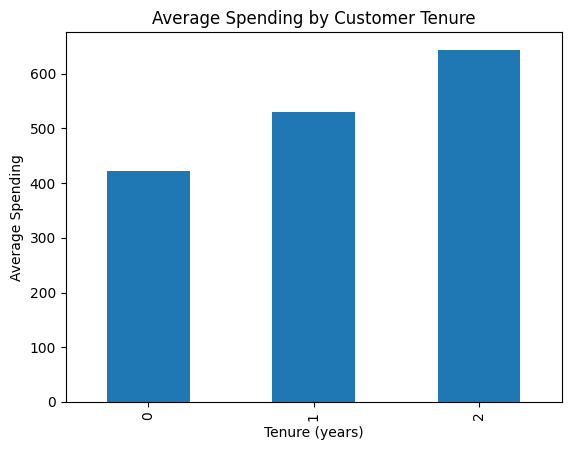

In [ ]:
# Calculate average spending by tenure
tenure_spending = df_clean.groupby('Customer_Tenure')['Total_Spending'].mean()
tenure_spending.plot(kind='bar', title='Average Spending by Customer Tenure', xlabel='Tenure (years)', ylabel='Average Spending')


In [36]:
# Perform ANOVA test to check significant differences in spending among customer with different tenure lengths

tenure_groups = [df_clean[df_clean['Customer_Tenure'] == tenure]['Total_Spending'] for tenure in df_clean['Customer_Tenure'].unique()]
anova_result = f_oneway(*tenure_groups)
print("ANOVA result:", anova_result)

ANOVA result: F_onewayResult(statistic=np.float64(20.755664191055406), pvalue=np.float64(1.1903603203043063e-09))


This very low p-value (far below the typical threshold of 0.05) implies that the differences observed in spending across tenure groups are statistically significant.

### Spending Habit Analysis

In [37]:
Total_Spending = df_clean[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

In [38]:
df_clean['Total_Spending'] = (
    df_clean['MntWines'] + 
    df_clean['MntFruits'] + 
    df_clean['MntMeatProducts'] + 
    df_clean['MntFishProducts'] + 
    df_clean['MntSweetProducts'] + 
    df_clean['MntGoldProds']
)

The chosen relevant_columns for heatmap below include key variables that help capture the core aspects of customer behavior, spending patterns, and engagement:

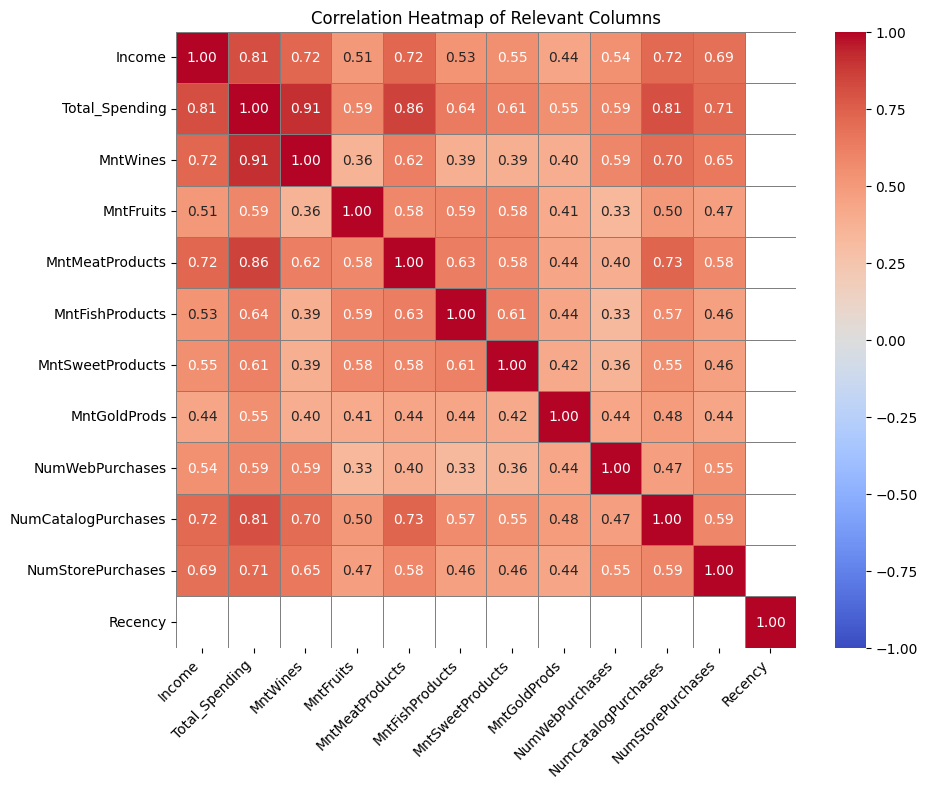

In [39]:
relevant_columns = [
    'Income', 'Total_Spending', 'MntWines', 'MntFruits', 'MntMeatProducts', 
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Recency'
]

# Filter the DataFrame to include only these relevant columns
df_relevant = df_clean[relevant_columns]

# Calculate the correlation matrix for relevant columns
correlation_matrix = df_relevant.corr()

# Mask weak correlations (e.g., between -0.2 and 0.2) for clarity
mask = np.abs(correlation_matrix) < 0.2
masked_correlation_matrix = correlation_matrix.mask(mask)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a heatmap of the correlation matrix with a focused color range
sns.heatmap(masked_correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
            cbar=True, vmin=-1, vmax=1, linewidths=0.5, linecolor='gray')

# Rotate labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Correlation Heatmap of Relevant Columns")
plt.show()

This heatmap shows the correlations among key variables in the dataset, focusing on spending patterns, income, and engagement metrics.

* Income shows a strong positive correlation with Total Spending (0.81). This suggests that as income increases, total spending generally rises, indicating that income is a good predictor of customer spending.
* Income also has moderate to strong correlations with individual product spending categories, such as MntWines (0.72), MntMeatProducts (0.72), and NumCatalogPurchases (0.72). This pattern implies that customers with higher incomes tend to spend more on specific products and may prefer catalog shopping.

Total Spending and Product Categories:

* Total Spending has high correlations with individual spending categories like MntWines (0.91), MntMeatProducts (0.86), and MntFishProducts (0.64). These correlations confirm that each product category contributes significantly to overall spending. The high correlation with wine spending, in particular, suggests that wine purchases are a substantial component of total spending for many customers.
* Total Spending also correlates with NumCatalogPurchases (0.81) and NumStorePurchases (0.71), showing that customers who spend more tend to engage across multiple channels, including catalog and in-store purchases.

Channel Engagement:

* NumWebPurchases, NumCatalogPurchases, and NumStorePurchases are positively correlated, with correlations around 0.5 to 0.7. This indicates that customers who shop through one channel are also likely to shop through others, suggesting that multi-channel engagement is common among these customers.

* NumCatalogPurchases has a strong correlation with Income (0.72), suggesting that higher-income customers may be more inclined to shop via catalogs.

Recency:

Recency (days since last purchase) has a lower correlation with most other variables, indicating that the frequency of recent purchases isn’t strongly tied to income, total spending, or individual product categories. This might suggest that some high-spending or high-income customers don’t necessarily shop more frequently.


Summary

Income is a strong predictor of both total spending and specific purchasing behaviors, particularly in catalog purchases.
Product Categories show high correlations with each other and with total spending, indicating that customers who spend more in one category often spend more in others.
Multi-Channel Engagement: Customers who are engaged in one purchasing channel tend to be active in others, with catalog purchases being popular among higher-income customers.
Recency has relatively weak correlations, suggesting that recent purchase frequency may not be a strong indicator of spending or income.

This heatmap effectively highlights the major spending patterns and customer behaviors, which could be useful for segmenting customers or targeting them based on spending habits and income levels.

Optimizing Inventory and Product Offerings (Product Category Popularity based on the total spending in each category)

Insight: This helps in making decisions about inventory management and merchandising by focusing on high-demand products.

In [40]:
# Define the spending columns to include in the Total_Spending calculation
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Create the Total_Spending column by summing across the specified columns for each row
df_clean['Total_Spending'] = df_clean[spending_columns].sum(axis=1)

# Verify the new column
print(df_clean[['Total_Spending']].head())

   Total_Spending
0            1617
1              27
2             776
3              53
4             422


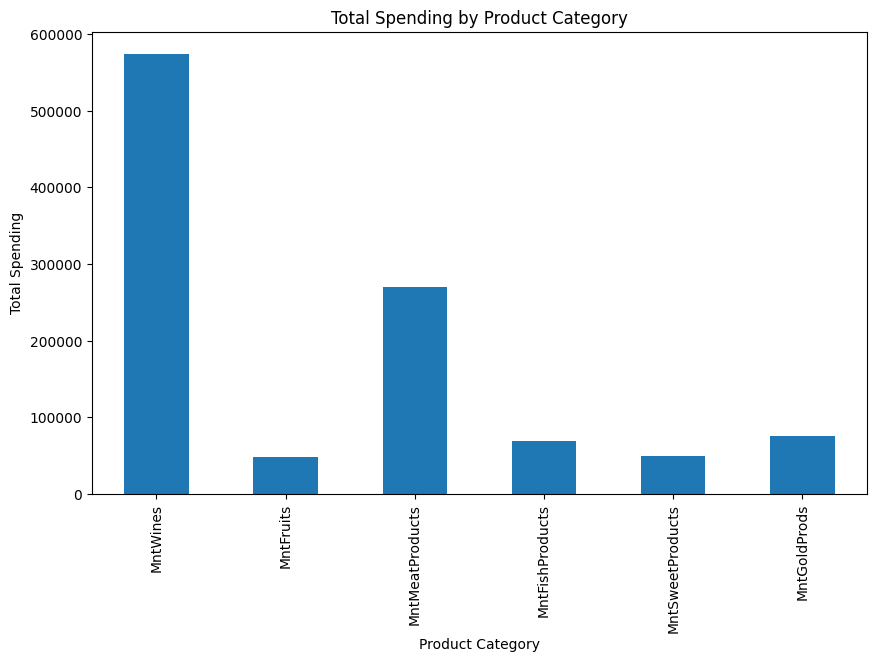

In [41]:
Total_Spending.plot(kind='bar', figsize=(10, 6))
plt.title('Total Spending by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Spending')
plt.show()


In [42]:
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Run ANOVA test across product spending categories
spending_data = [df_clean[product] for product in product_columns]
anova_result = f_oneway(*spending_data)
print("ANOVA result for Total Spending across Product Categories:", anova_result)

# Interpretation
if anova_result.pvalue < 0.05:
    print("There is a statistically significant difference in spending across product categories.")
else:
    print("No statistically significant difference in spending across product categories.")

ANOVA result for Total Spending across Product Categories: F_onewayResult(statistic=np.float64(921.475455786467), pvalue=np.float64(0.0))
There is a statistically significant difference in spending across product categories.


Key Insights:

* Wines (MntWines) have the highest total spending, significantly outpacing all other product categories. This indicates that wines are the most popular product and should be prioritized in terms of inventory management, promotions, and shelf space.


* Meat Products (MntMeatProducts) also show high total spending, though at a lower level compared to wines. This suggests that meat is an important category and warrants focused stocking efforts to meet customer demand.
Spending in other categories, such as Fruits, Fish Products, Sweets, and Gold Products, is much lower. These categories have relatively lower demand and might benefit from strategic promotions to boost sales or be stocked at lower levels to optimize inventory costs.

Inventory Optimization Recommendations:

* Wines should be prioritized in terms of availability, ensuring adequate stock to meet demand and minimizing the risk of stockouts. Promotions related to wine can also be more effective in driving revenue.

* Meat products should be stocked in moderate to high quantities, with focused promotional efforts to further increase sales.

* For fruits, fish, sweets, and gold products, a careful inventory strategy should be applied to avoid excess stocking while ensuring sufficient availability for the smaller but stable customer base interested in these products.

* This analysis helps optimize inventory management by identifying high-demand products and allocating shelf space, promotional efforts, and inventory resources accordingly.

# Demographic Influence on Spending
* Age Analysis
* Education Level Analysis
* Income Analysis
* Marital Status and Household Composition


### Age Analysis

Analyze how customer age influences spending across different product categories (wine, fruits, meat, etc.). We will create age groups (e.g., 18-30, 31-45, 46-60, 60+) to compare average spending in each group.

Visualization: Plot the average spending in each category for different age groups to see if any significant trends emerge.

Insight: This analysis will help identify which age groups are more likely to purchase specific products, aiding in targeted promotions and product recommendations.

In [43]:
df_clean['Age_Group'] = pd.cut(2014 - df_clean['Year_Birth'], bins=[0, 30, 45, 60, 121], labels=['18-30', '31-45', '46-60', '60+'])

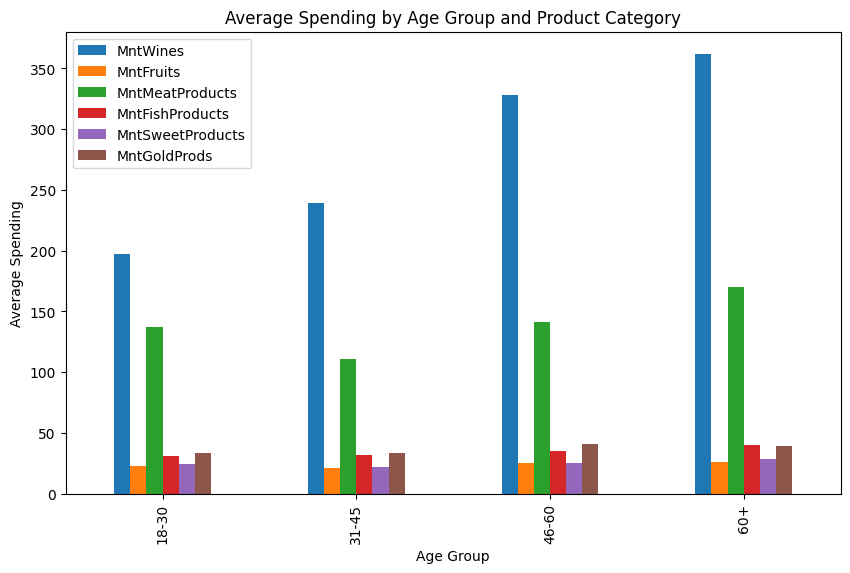

In [44]:
age_spending = df_clean.groupby('Age_Group')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()
age_spending.plot(kind='bar', figsize=(10, 6))
plt.title('Average Spending by Age Group and Product Category')
plt.xlabel('Age Group')
plt.ylabel('Average Spending')
plt.show()

In [45]:
print(df_clean.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Year', 'Age', 'Has_Kids_Teens', 'Customer_Tenure', 'Total_Spending',
       'Age_Group'],
      dtype='object')


Based on the visualization of Average Spending by Age Group and Product Category, here are some key insights:

High Spending in Wine and Meat Products:

* Customers in 46-60 and 60+ age groups show significantly higher spending on wines compared to other age groups.
* Spending on meat products is also notable across all age groups but is highest for customers aged 18-30. This indicates a preference for meat among younger customers.

Moderate Spending Across Other Product Categories:

* Fruits, sweets, fish, and gold products have relatively low spending compared to wines and meat across all age groups.
* However, customers aged 60+ tend to spend slightly more on gold products and fruits compared to other age groups.

Differences in Spending Patterns by Age:

* The 18-30 age group shows high spending on both wines and meat, suggesting a higher budget or inclination toward lifestyle and social activities.
* The 31-45 and 46-60 age groups show moderate spending across categories, indicating a balanced expenditure pattern.
* Customers aged 60+ seem to prioritize wines and gold products, potentially indicating an interest in luxury items or gifts.

Actionable Insights:

Targeted Promotions:
Design promotions focused on wines and meat products for the 18-30 age group to capitalize on their higher spending in these categories.
Develop targeted campaigns for gold products and wines for customers aged 60+, as these are the primary categories of interest.

Product Recommendations:
Consider developing premium wine bundles or exclusive meat deals for younger customers, especially those aged 18-30.
For customers in the 60+ category, offer luxury or premium products such as gold and high-quality wines to cater to their preferences.
These insights can help tailor marketing efforts, product offerings, and promotions to align with the spending behavior of different age groups, thereby improving customer engagement and boosting sales.

One-Way ANOVA for Each Product Category by Age Group

In [46]:
# List of product spending columns
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Run ANOVA for each product category
for product in product_columns:
    groups = [df_clean[product][df_clean['Age_Group'] == age].values for age in df_clean['Age_Group'].unique()]
    anova_result = f_oneway(*groups)
    print(f"ANOVA result for {product} by Age Group:", anova_result)

ANOVA result for MntWines by Age Group: F_onewayResult(statistic=np.float64(20.63307957313568), pvalue=np.float64(3.5930399297475206e-13))
ANOVA result for MntFruits by Age Group: F_onewayResult(statistic=np.float64(2.4173329437893534), pvalue=np.float64(0.06460039249001893))
ANOVA result for MntMeatProducts by Age Group: F_onewayResult(statistic=np.float64(10.006902237784026), pvalue=np.float64(1.5124262916733123e-06))
ANOVA result for MntFishProducts by Age Group: F_onewayResult(statistic=np.float64(2.0223212175220944), pvalue=np.float64(0.10875091668500221))
ANOVA result for MntSweetProducts by Age Group: F_onewayResult(statistic=np.float64(2.0261394894640636), pvalue=np.float64(0.10821003567147063))
ANOVA result for MntGoldProds by Age Group: F_onewayResult(statistic=np.float64(5.369945657325156), pvalue=np.float64(0.0011070331482910308))


Significant Differences: There are significant spending differences by age group for MntWines, MntMeatProducts, and MntGoldProds. This suggests that different age groups have varying preferences in these categories.


Non-Significant Differences: Spending on MntFruits, MntFishProducts, and MntSweetProducts does not significantly vary by age group.

For the categories with significant ANOVA results (MntWines, MntMeatProducts, and MntGoldProds), I'm going to run a Tukey HSD post-hoc test to determine which specific age groups differ in spending within each category.

In [47]:
# Run Tukey HSD post-hoc tests for significant categories
significant_product_columns = ['MntWines', 'MntMeatProducts', 'MntGoldProds']
for product in significant_product_columns:
    print(f"\nTukey HSD Post-hoc Test for {product} by Age Group:")
    posthoc = pairwise_tukeyhsd(df_clean[product], df_clean['Age_Group'], alpha=0.05)
    print(posthoc.summary())


Tukey HSD Post-hoc Test for MntWines by Age Group:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
 18-30  31-45  42.4077 0.2777 -18.4598 103.2752  False
 18-30  46-60 131.6579    0.0  68.8986 194.4172   True
 18-30    60+ 165.3436    0.0  89.5947 241.0926   True
 31-45  46-60  89.2503    0.0  47.5911 130.9095   True
 31-45    60+  122.936    0.0   63.483  182.389   True
 46-60    60+  33.6857 0.4926 -27.7027  95.0741  False
------------------------------------------------------

Tukey HSD Post-hoc Test for MntMeatProducts by Age Group:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
 18-30  31-45 -26.1565 0.1429 -57.6788  5.3659  False
 18-30  46-60   4.4381 0.9852  -28.064 36.9402  False
 18-30    60+   33.272 0.1289  -5.9572 72.5013  False
 31-45  46-60  

Summary of Insights

Wine Spending: Older age groups (46-60 and 60+) spend significantly more on wines than younger groups (18-30 and 31-45).

Meat Product Spending: The 31-45 group spends significantly less on meat products than both the 46-60 and 60+ groups.

These findings can guide targeted marketing, focusing higher-priced products like wines and meats towards older age groups, who are more likely to spend more on these items

### Education Level Analysis

In [48]:
# Group the data by education level
groups = df_clean.groupby('Education')['Total_Spending']

# Extract spending data for each education group
education_groups = [group for name, group in groups]

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(*education_groups)

# Print the results
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant difference in spending between education levels (reject H0).")
else:
    print("There is no statistically significant difference in spending between education levels (fail to reject H0).")


F-statistic: 16.99297864866997
P-value: 6.665415154789666e-11
There is a statistically significant difference in spending between education levels (reject H0).


In [49]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=df_clean['Total_Spending'], groups=df_clean['Education'], alpha=0.05)

# Print the results
print(tukey)


                   Multiple Comparison of Means - Tukey HSD, FWER=0.05                    
         group1                   group2          meandiff p-adj   lower    upper   reject
------------------------------------------------------------------------------------------
         Basic Education Graduation (Unspecified) 444.3224    0.0 253.1462 635.4987   True
         Basic Education                   Master 418.1379    0.0 222.6076 613.6682   True
         Basic Education                      PhD 531.1378    0.0 334.0887 728.1868   True
Graduation (Unspecified)                   Master -26.1845 0.7945 -99.4132  47.0441  False
Graduation (Unspecified)                      PhD  86.8153 0.0202    9.623 164.0076   True
                  Master                      PhD 112.9999  0.005   25.579 200.4207   True
------------------------------------------------------------------------------------------



Basic Education has significantly lower spending compared to all other education levels.

There is a significant difference between Graduation (Unspecified) and PhD, and also between Master and PhD, indicating that education levels do impact spending behavior differently.

### Income Analysis
Examine how income levels impact spending patterns. Customers will be grouped into income categories (e.g., low, medium, high income), and we will assess how spending varies among these groups.

Insight: Understanding the spending power of different income groups can help design premium offerings or discount strategies.

In [50]:
df_clean['Total_Spending'] = df_clean[
    ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
].sum(axis=1)

In [51]:
print(df.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp4  AcceptedCmp5  \
0  2012-09-04       58       635  ...             0             0   
1  2014-03-08       38        11  ...             0             0   
2  2013-08-21       26       426  ...             0             0   
3  2014-02-10       26        11  ...             0             0   
4  2014-01-19       94       173  ...             0             0   

   AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  \
0             0             0        

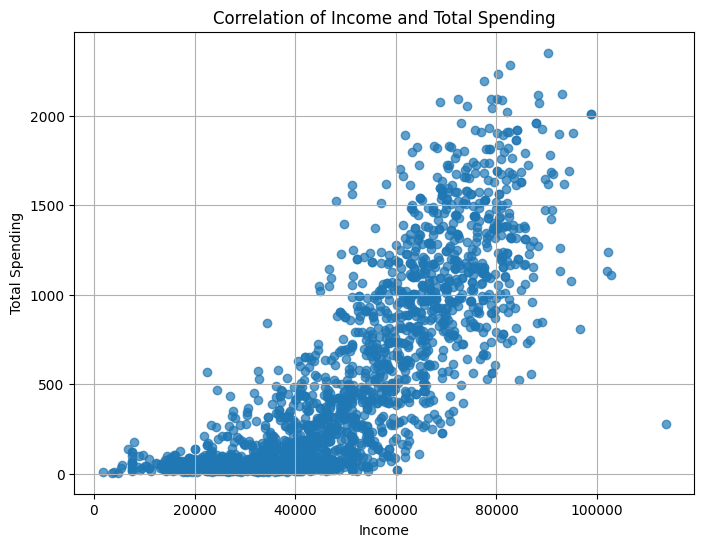

In [52]:
plt.figure(figsize=(8, 6))
plt.scatter(df_clean['Income'], df_clean['Total_Spending'], alpha=0.7)
plt.title('Correlation of Income and Total Spending')
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.grid(True)
plt.show()

Positive Correlation: There is a clear upward trend, indicating a positive correlation between Income and Total Spending. As income increases, total spending tends to increase as well.


Non-Linear Pattern: Although there is a positive correlation, the relationship does not appear to be perfectly linear. At lower income levels, spending is more spread out and clustered near the bottom. As income increases, spending generally rises but at varying rates, possibly due to differences in spending habits.


High Density at Lower Incomes: There is a high concentration of points at lower income and spending levels, indicating that a significant number of customers fall into this category.


Outliers: A few points in the upper right indicate customers with both high income and high spending, but they are relatively rare compared to the main cluster.


This plot effectively shows that higher-income customers tend to spend more, but spending also varies across similar income levels, suggesting diverse spending habits among customers. This information could be useful for understanding different customer segments or creating targeted marketing strategies based on income and spending behavior.

Calculate the Pearson correlation coefficient between 'Income' and 'Total_Spending'

In [53]:
income_total_spending_corr = df_clean['Income'].corr(df_clean['Total_Spending'], method='pearson')

# Print the correlation coefficient
print("Pearson Correlation Coefficient between Income and Total Spending:", income_total_spending_corr)

Pearson Correlation Coefficient between Income and Total Spending: 0.8128730040703087


strong positive correlation, income is a significant factor influencing spending behavior in customer base

In [54]:
df_clean['Income_Group'] = pd.cut(
    df_clean['Income'], 
    bins=[1729, 51381.5, 68289.75, 666666],  # Using min, median (Q2), and max
    labels=['Low', 'Medium', 'High']  # Three groups: Low, Medium, High
)


print(df_clean['Income_Group'].value_counts())

Income_Group
Low       1117
Medium     522
High       421
Name: count, dtype: int64


Checking correlation between education level and income since income is a significant factor influencing spending behavior

In [55]:
df_clean['Education_Num'] = df_clean['Education'].map({
    'Basic Education': 1,
    'Graduation (Unspecified)': 2,
    'Master': 3,
    'PhD': 4
})

# Calculate correlation between Education_Num, Total_Spending, and Income
correlation_matrix = df_clean[['Education_Num', 'Total_Spending', 'Income']].corr()

# Print the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)



Correlation Matrix:
                Education_Num  Total_Spending    Income
Education_Num        1.000000        0.093885  0.155695
Total_Spending       0.093885        1.000000  0.812873
Income               0.155695        0.812873  1.000000


Education level doesn't have a strong direct correlation with total spending. However, income has a strong impact on spending, which makes sense as higher-income individuals tend to have more disposable income.
Income seems to be a key driver for spending behavior in your dataset, while education has only a minor influence.

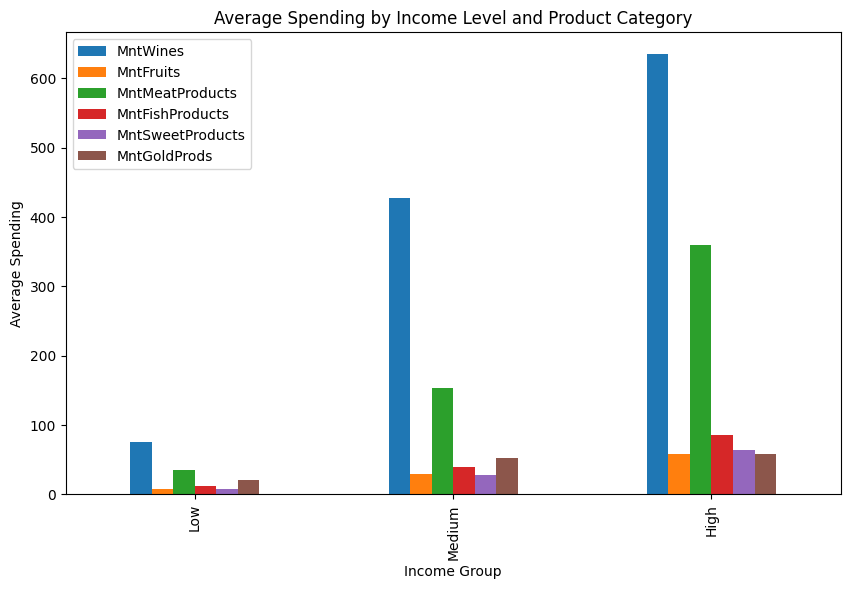

In [56]:
income_spending = df_clean.groupby('Income_Group')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()
income_spending.plot(kind='bar', figsize=(10, 6))
plt.title('Average Spending by Income Level and Product Category')
plt.xlabel('Income Group')
plt.ylabel('Average Spending')
plt.show()


Based on the Average Spending by Income Level and Product Category visualization, we can observe how different income groups impact spending patterns across various product categories:

Key Insights:

Significant Variation in Spending Across Income Groups:

* High-income customers show significantly higher average spending in almost all categories, particularly for wines and meat products.
* This is especially evident in wine and meat products, where the high-income group spends far more compared to the other income groups.

High Spending on Specific Categories:

* The high-income group shows the highest spending on wines and meat products, with wine expenditure exceeding 600 on average.
* The medium-income group also shows noticeable spending on wines and meat products, but to a lesser extent compared to the high-income group.
* Customers in the low-income group have relatively low spending across all categories, with minimal variation among different product types.

Low and Medium Income Group Behavior:

* Low-income customers have relatively balanced but low spending across all product categories.
* Medium-income customers prioritize spending on wines and meat products, indicating an interest in lifestyle-related products but with budget limitations compared to the high-income group.

In [57]:
# Define the product categories
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Run ANOVA for each product category by income group
for product in product_columns:
    # Group spending by income level
    groups = [df_clean[product][df_clean['Income_Group'] == income].values for income in df_clean['Income_Group'].unique()]
    
    # Run ANOVA test
    anova_result = f_oneway(*groups)
    print(f"ANOVA result for {product} by Income Group:", anova_result)

# Interpretation
# If the p-value for any product category is less than 0.05, that category shows significant spending differences across income groups.

ANOVA result for MntWines by Income Group: F_onewayResult(statistic=np.float64(1088.121296102609), pvalue=np.float64(4.4e-323))
ANOVA result for MntFruits by Income Group: F_onewayResult(statistic=np.float64(410.5425839321928), pvalue=np.float64(9.405326169817909e-151))
ANOVA result for MntMeatProducts by Income Group: F_onewayResult(statistic=np.float64(1370.997926252435), pvalue=np.float64(0.0))
ANOVA result for MntFishProducts by Income Group: F_onewayResult(statistic=np.float64(471.28770231837694), pvalue=np.float64(3.202441992784876e-169))
ANOVA result for MntSweetProducts by Income Group: F_onewayResult(statistic=np.float64(510.7662595172149), pvalue=np.float64(7.941943402372278e-181))
ANOVA result for MntGoldProds by Income Group: F_onewayResult(statistic=np.float64(240.2976747081743), pvalue=np.float64(1.6332841697611904e-94))


The very high F-statistics and extremely small p-values across all categories indicate that spending differences across income groups are statistically significant for each product category. This supports the observation that high-income customers generally spend more on all product categories, especially on wines and meat products.

These results statistically back up the insight that high-income customers spend significantly more across categories.

Actionable Insights:

High-income customers 
- They spend significantly more on wines and meat products
- Offering premium bundles or exclusive promotions on these items could maximize revenue from this segment.
- Exclusive loyalty programs or personalized promotions for high-income customers could enhance engagement with this segment.

Medium-income customers
- Offering discounts on wines or creating value packs for meats could encourage higher spending while still fitting within their budget.
- Consider bundle offers or seasonal promotions to control product stock and incentivize more spending from low-income customers across various categories.

Low-income customers
- Consider targeted promotions, such as bundle offers, to increase spending across various categories. These could help low-income customers perceive more value while driving incremental sales.

Focus on Wine and Meat Categories
- With high interest in wines and meats, marketing efforts centered around these products can engage both high- and medium-income customers effectively.
- Promotions like 'buy more, save more' for meats might be especially appealing to medium-income groups.

### Marital Status and Household Composition Analysis

To explore spending behavior differences between married vs. single customers or customers with children vs. without children.

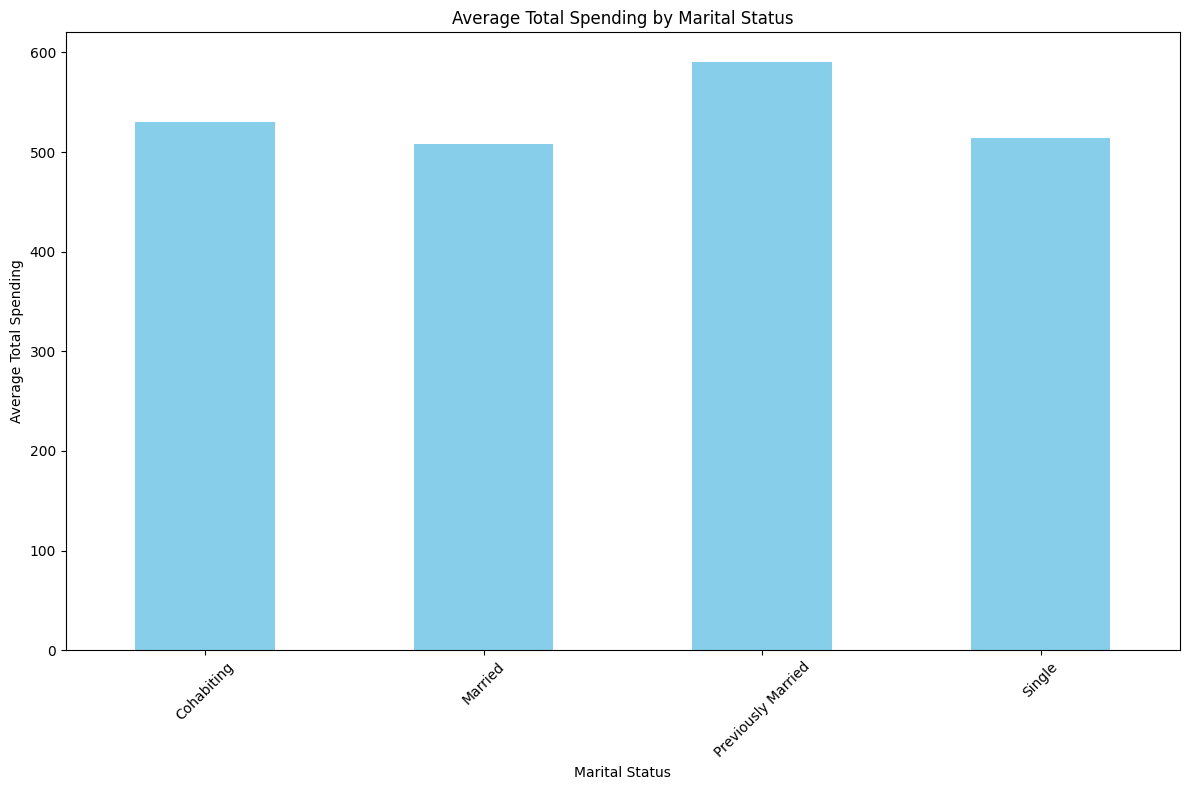

In [58]:
marital_spending = df_clean.groupby('Marital_Status')['Total_Spending'].mean()


marital_spending.plot(kind='bar', figsize=(12, 8), color='skyblue')
plt.title('Average Total Spending by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Average Total Spending')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The bar chart shows the average total spending for customers based on their marital status. Here’s a breakdown of what we see:

Previously Married customers have the highest average spending, followed by Cohabiting customers.

Single and Married customers show lower average spending compared to the other groups, with Married customers having the lowest average spending.

This could suggest that marital status influences spending behavior, with individuals who are previously married or cohabiting tending to spend more on average.


To assess whether the differences in spending among the marital status groups are statistically significant, we can perform a one-way ANOVA test. This test will help us determine if the average spending differs significantly between at least two of the marital status groups.

In [59]:
# Perform one-way ANOVA
marital_status_groups = [df_clean[df_clean['Marital_Status'] == status]['Total_Spending'] for status in df_clean['Marital_Status'].unique()]
anova_result = stats.f_oneway(*marital_status_groups)
print("ANOVA result:", anova_result)

ANOVA result: F_onewayResult(statistic=np.float64(1.749853499143754), pvalue=np.float64(0.15476810524436813))


The p-value of 0.155 is higher than the common significance level of 0.05. This means we do not have enough evidence to reject the null hypothesis.


The result indicates that marital status does not significantly impact total spending in THE  data. In other words, the variations in spending between the different marital status groups are likely due to random chance rather than a true effect of marital status on spending.

### Spending Behavior by Household Composition Analysis

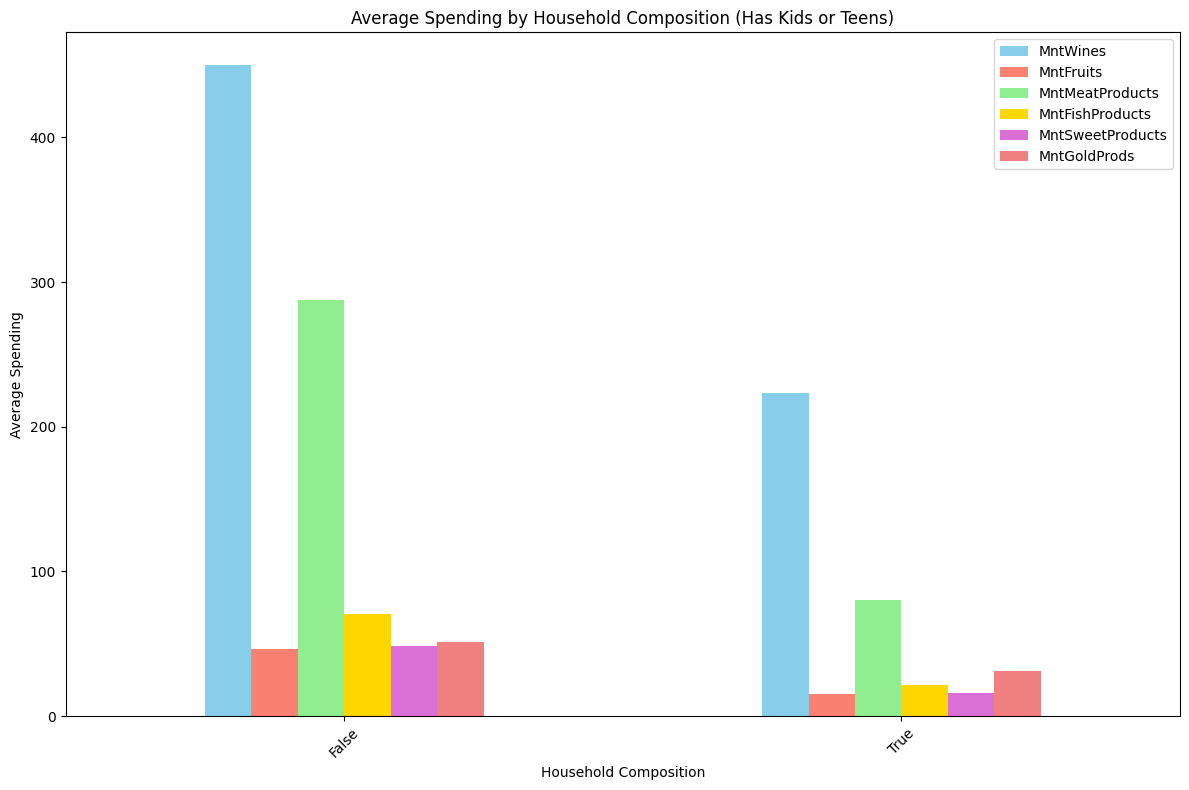

In [60]:
# Group by Has_Kids_Teens and calculate the average spending on different product categories
household_spending = df_clean.groupby('Has_Kids_Teens')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()

# Plot the result
household_spending.plot(kind='bar', figsize=(12, 8), color = ['skyblue', 'salmon', 'lightgreen', 'gold', 'orchid', 'lightcoral'])
plt.title('Average Spending by Household Composition (Has Kids or Teens)')
plt.xlabel('Household Composition')
plt.ylabel('Average Spending')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Households without kids or teens (False) tend to spend more on most categories, especially on Wines and Meat Products, compared to households with kids or teens (True).

Households with kids or teens spend less on average across all product categories, which might suggest they prioritize other expenses or have budget constraints due to additional family responsibilities.

T-Test: Comparing Spending Between Customers With and Without Children

We use a T-test to compare the average spending between customers with children (Kidhome+TeenHome > 0) and those without (Kidhome+TeenHome == 0). This test will show whether the difference in average spending on each category between the two groups is significant.

In [61]:
from scipy.stats import ttest_ind

# List of product categories to test
categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Results dictionary to store the p-values of each test
t_test_results = {}

# Perform t-tests for each category
for category in categories:
    spending_with_kids = df_clean[df_clean['Has_Kids_Teens'] == True][category]
    spending_without_kids = df_clean[df_clean['Has_Kids_Teens'] == False][category]
    t_stat, p_value = ttest_ind(spending_with_kids, spending_without_kids)
    t_test_results[category] = p_value

# Display the results
for category, p_value in t_test_results.items():
    print(f"{category}: p-value = {p_value}")


MntWines: p-value = 2.0415614763072348e-44
MntFruits: p-value = 1.3732301149204619e-64
MntMeatProducts: p-value = 6.269314654771189e-153
MntFishProducts: p-value = 4.978091744569618e-87
MntSweetProducts: p-value = 1.2105363140772887e-65
MntGoldProds: p-value = 9.338158708298369e-23


Each p-value is extremely low (all are much less than the common threshold of 0.05), indicating statistically significant differences in average spending between households with and without kids or teens across all product categories.

This suggests that whether a household has kids or teens influences spending patterns for every type of product examined.

**Multi-Channel Shopping Behavior and Income Insights**

NumWebPurchases, NumCatalogPurchases, and NumStorePurchases are positively correlated, with correlations around 0.5 to 0.7. This indicates that customers who shop through one channel are also likely to shop through others, suggesting that multi-channel engagement is common among these customers.
NumCatalogPurchases has a strong correlation with Income (0.72), suggesting that higher-income customers may be more inclined to shop via catalogs.

Analyzing customer purchase behaviors shows that those who use one shopping channel, like web or catalog, are likely to use others too, highlighting a trend toward multi-channel shopping. Additionally, higher-income customers seem more inclined to shop via catalogs. Understanding these patterns can help in tailoring strategies for different shopping preferences.

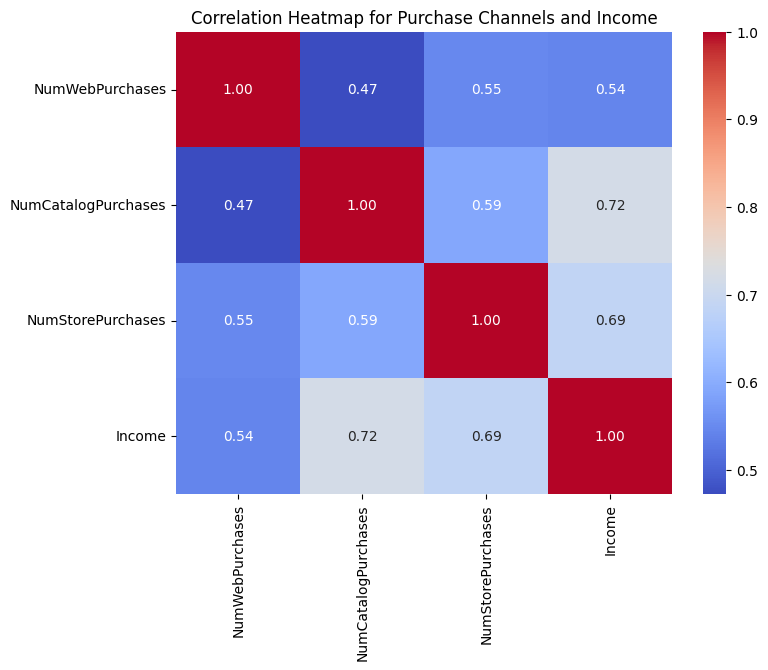

NumWebPurchases and NumCatalogPurchases: Correlation = 0.47, p-value = 0.00000
NumWebPurchases and NumStorePurchases: Correlation = 0.55, p-value = 0.00000
NumCatalogPurchases and Income: Correlation = 0.72, p-value = 0.00000


In [62]:
from scipy.stats import pearsonr
# Create a DataFrame with only relevant columns
purchase_data = df_clean[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Income']]

# Plot a heatmap to visualize correlations
plt.figure(figsize=(8, 6))
sns.heatmap(purchase_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for Purchase Channels and Income")
plt.show()

# Statistical Tests: Pearson correlation test for each relevant pair
# (1) NumWebPurchases and NumCatalogPurchases
corr_web_catalog, p_web_catalog = pearsonr(purchase_data['NumWebPurchases'], purchase_data['NumCatalogPurchases'])
# (2) NumWebPurchases and NumStorePurchases
corr_web_store, p_web_store = pearsonr(purchase_data['NumWebPurchases'], purchase_data['NumStorePurchases'])
# (3) NumCatalogPurchases and Income
corr_catalog_income, p_catalog_income = pearsonr(purchase_data['NumCatalogPurchases'], purchase_data['Income'])

# Display correlation values and p-values
print(f"NumWebPurchases and NumCatalogPurchases: Correlation = {corr_web_catalog:.2f}, p-value = {p_web_catalog:.5f}")
print(f"NumWebPurchases and NumStorePurchases: Correlation = {corr_web_store:.2f}, p-value = {p_web_store:.5f}")
print(f"NumCatalogPurchases and Income: Correlation = {corr_catalog_income:.2f}, p-value = {p_catalog_income:.5f}")

NumWebPurchases and NumCatalogPurchases (0.47):

There’s a moderate positive correlation (0.47) between the number of web and catalog purchases. This suggests that customers who tend to make purchases online may also shop through catalogs, but the correlation is not very strong.
NumWebPurchases and NumStorePurchases (0.55):

The correlation between web and store purchases is slightly stronger (0.55), indicating that customers who buy through web channels also frequently purchase in-store. This moderate positive correlation suggests some multi-channel purchasing behavior between these two channels.
NumCatalogPurchases and NumStorePurchases (0.59):

The relationship between catalog and store purchases has a moderate correlation of 0.59. This implies that customers who shop via catalogs are also somewhat likely to shop in-store.
Income and NumCatalogPurchases (0.72):

The strongest correlation in the matrix is between income and catalog purchases (0.72). This indicates a significant positive relationship, suggesting that higher-income customers are more inclined to make purchases through catalogs compared to lower-income customers.
Income and NumStorePurchases (0.69):

There’s also a strong positive correlation between income and in-store purchases (0.69), showing that higher-income individuals tend to make more in-store purchases.
Income and NumWebPurchases (0.54):

Income and web purchases have a moderate positive correlation (0.54), meaning that while higher-income customers tend to shop online more than lower-income ones, this behavior is not as pronounced as for catalogs or in-store purchases.


Summary

This heatmap indicates that multi-channel engagement is common among customers, as customers tend to shop across multiple channels (web, catalog, and store). Additionally, income plays a significant role in influencing shopping behavior, especially with catalog and in-store purchases, where higher-income customers are more inclined toward these channels. This insight can guide marketing strategies to focus on specific channels based on customer income levels.

**Average Number of Deals Purchases**

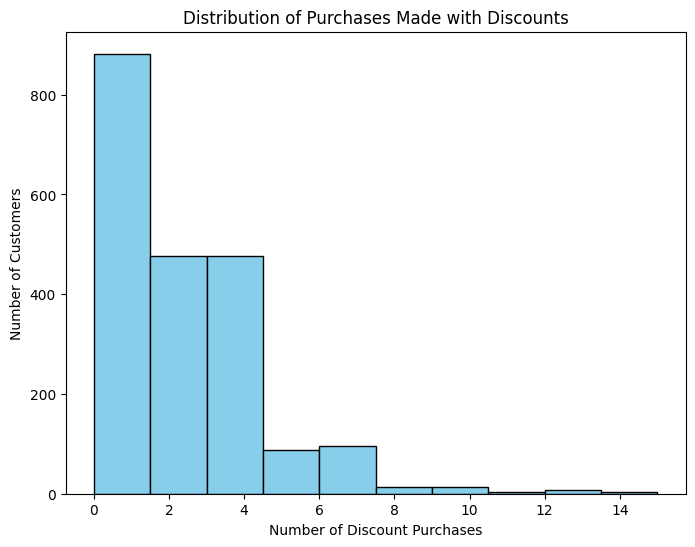

In [63]:
# Plot histogram of NumDealsPurchases
plt.figure(figsize=(8, 6))
df_clean['NumDealsPurchases'].plot(kind='hist', bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Purchases Made with Discounts')
plt.xlabel('Number of Discount Purchases')
plt.ylabel('Number of Customers')
plt.show()

Majority of Customers Make Few or No Discount Purchases: The most common value is 0, indicating that a significant number of customers rarely make purchases with discounts. This can be seen in the high bar at the very left of the histogram, representing customers with zero discount purchases.

Decreasing Frequency with Higher Discount Purchases: As the number of discount purchases increases, the frequency of customers in each category decreases. This suggests that only a smaller portion of customers regularly take advantage of discounts, with very few making more than 4-5 discount purchases.

Outliers with High Discount Purchases: A small number of customers have a relatively high number of purchases with discounts (up to 14-15). These outliers may represent a segment of price-sensitive or deal-seeking customers who could be more responsive to discount-based promotions.

In summary, most customers have a low engagement with discount purchases, but there is a small subset that is highly engaged with discounts. This insight could guide the marketing team to focus targeted discount offers on these high-engagement customers, while exploring other types of promotions for those less inclined to seek discounts.

**Customer Engagement and Marketing Strategy**
* Campaign Effectiveness based on the acceptance rate of various campaigns (e.g., AcceptedCmp1, AcceptedCmp2, etc.).

Insight: The analysis will provide insights into which campaigns resonate most with customers, helping in the creation of more effective marketing strategies.

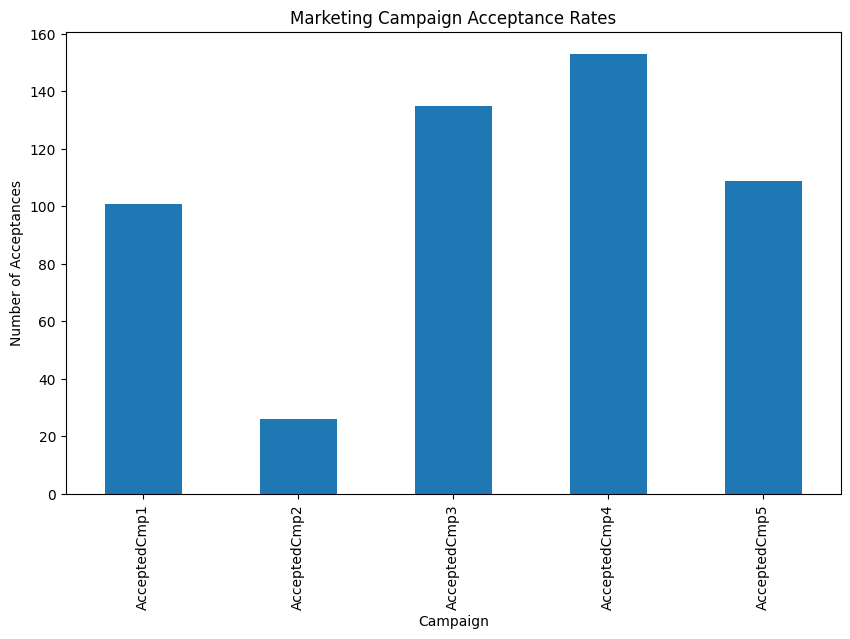

In [64]:
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
df_clean[campaign_columns].sum().plot(kind='bar', figsize=(10, 6))
plt.title('Marketing Campaign Acceptance Rates')
plt.xlabel('Campaign')
plt.ylabel('Number of Acceptances')
plt.show()

Key Insights:

Campaigns 3, 4, and 5 have the highest number of acceptances, indicating that these campaigns were most successful in engaging customers. These campaigns might have offered more appealing incentives or targeted the right audience effectively.
Campaign 1 also had a high acceptance rate, though slightly lower than campaigns 3, 4, and 5.
Campaign 2 has a significantly lower acceptance rate compared to the others. This indicates that it may not have resonated well with customers, suggesting that either the offer was not appealing, or the audience targeting was not optimal.

Marketing Strategy Recommendations:

Continue with the strategies used in Campaigns 3, 4, and 5, as they are clearly effective and resonate most with customers. Analyze what made these campaigns successful, such as the type of offer, timing, or customer segmentation, and try to replicate these factors in future campaigns.

Review Campaign 1 to search for available improvement point to be as effective as Campaign 3, 4, 5.

Remove Campaign 2 and relocate its budget to other successful campaign, as it has the lowest acceptance rate. Investigate the reasons behind the poor performance—whether it was the nature of the offer, customer segment targeted, or any other factors—and make adjustments to improve effectiveness in building a campaign.

Targeted Campaigns: Since campaigns 3, 4, and 5 show consistent acceptance, future campaigns should focus on the attributes that led to their success, such as more personalized offers or well-timed promotions.

# Summary
**Who Our Customers Are and How They Spend**

By Age: Younger customers (18-30) show a preference for wine and meat, as do our older customers (60+). Middle-aged shoppers spend a bit more evenly across all product categories.

By Income: Higher-income shoppers stand out for their wine and meat purchases, while lower-income customers spend noticeably less, highlighting differences in buying power.

By Household: Customers without children tend to spend more on wine and meat, while cohabiting and previously married shoppers have similar spending patterns on these items.

**Customer Segments**

Through clustering analysis, we found three primary customer groups:

High-income wine lovers: This segment’s higher spending on wine makes them ideal for premium product offers and loyalty perks.

Moderate-income steady spenders: These shoppers consistently spend across categories and would benefit from targeted promotions.

Budget-focused shoppers: Lower-income customers with limited spending power would likely appreciate discounts and budget-friendly options.

**What Our Customers Buy**

Popular Categories: Wine and meat top the list, indicating strong customer preference. This makes them ideal for retention strategies and upselling.

Opportunities to Grow: Spending is lower on fruits, sweets, and fish. Promotions here could spark additional purchases and help boost sales in these categories.

**Engaging Through Campaigns**

Campaign Success: Campaigns 3, 4, and 5 had the highest engagement rates, while Campaign 2 lagged. Adjusting Campaign 2 could increase participation — possibly with more tailored messages or better timing.

Shopping Channels: Our heatmap analysis reveals that customers who purchase through one channel (web, catalog, or store) often shop through others as well, which confirms the value of a multi-channel marketing approach.


**Recommendations for Stakeholders**

1. Make Campaigns Personal and Relevant
Targeted Offers: Let’s create offers that match our customers’ lifestyles. For instance, exclusive wine deals could appeal to high-income groups and older customers, while families might love promotions on everyday essentials. This way, each customer feels like the offers are just for them.
Encourage Multi-Channel Shopping: Since many of our customers use more than one shopping method, we can create cross-channel incentives that make it easy and rewarding to shop with us—whether online, in-store, or through catalogs.

2. Focus on the Right Products
Double Down on Popular Choices: Wine and meat are top picks for our customers. Let’s make sure we keep these stocked and consider adding premium versions or loyalty perks to keep our high-spending customers coming back.
Grow Sales in Underused Categories: Fruits, sweets, and fish have room for growth. We can boost interest with fun campaigns, limited-time bundles, or discounts to draw attention to these categories.

3. Improve Stock Availability Where It Matters Most
Smart Stocking for Popular Items: With strong demand for wine and meat, we should prioritize these items to prevent stockouts, keeping our most loyal customers happy.
Prepare for Promotional Demand: As we increase promotions for fruits, sweets, and fish, we should plan inventory to ensure these products are available when demand rises.



**Targeted Marketing**

* Focus marketing campaigns on high-income customers for premium product offerings, especially wine.
* Younger customers and those with no children should be targeted for promotions on meat and wine products.

**Campaign Improvement**

* Consider either revising Campaign 2 based on feedback or reallocating its budget to the more successful Campaigns 3, 4, and 5.
* Continue leveraging the successful elements of Campaigns 3, 4, and 5.
* Analyze Campaign 1's performance further to determine if there are specific segments it resonated with. If so, consider tailoring Campaign 1 further for those specific segments; otherwise, reallocate resources to campaigns that performed better.

**Product Development and Inventory Management**

* Ensure sufficient stock of wine and meat products to meet customer demand.
* Consider targeted promotions for lower-demand categories like sweets and fruits to balance inventory and boost sales.

**Customer Engagement**

* Develop loyalty programs specifically for high-value customer segments to enhance satisfaction and retention.
* Offer tailored product bundles or discounts for younger customers to boost spending across a wider range of categories.


This summary highlights key findings from the analysis and provides actionable recommendations for better targeting customers, managing inventory, and optimizing marketing efforts.

Last Checkpoint before processing the data in Tableau

In [65]:
# Convert Income_Group to string type to ensure labels are saved as text
df_clean['Income_Group'] = df_clean['Income_Group'].astype(str)

In [66]:
display(df_clean.describe(), df_clean.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year,Age,Customer_Tenure,Total_Spending,Education_Num
count,2060.000000,2060.000000,2060.000000,2060.000000,2060.000000,2060,2060.000000,2060.000000,2060.000000,2060.000000,...,2060.000000,2060.000000,2060.0,2060.0,2060.000000,2060.000000,2060.000000,2060.000000,2060.000000,2060.000000
mean,5584.921845,1968.745146,49764.629126,0.477184,0.530583,2013-07-14 07:07:48.349514752,48.810194,278.780583,23.138835,131.100000,...,0.012621,0.009709,3.0,11.0,0.131068,2013.040777,45.254854,0.959223,526.884466,2.673786
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,3.0,11.0,0.000000,2012.000000,18.000000,0.000000,5.000000,1.000000
25%,2813.250000,1959.000000,34404.000000,0.000000,0.000000,2013-01-21 18:00:00,24.000000,21.000000,1.000000,14.000000,...,0.000000,0.000000,3.0,11.0,0.000000,2013.000000,37.000000,0.000000,63.750000,2.000000
50%,5492.000000,1970.000000,49462.500000,0.000000,1.000000,2013-07-15 00:00:00,49.000000,151.500000,7.000000,56.000000,...,0.000000,0.000000,3.0,11.0,0.000000,2013.000000,44.000000,1.000000,310.000000,2.000000
75%,8407.250000,1977.000000,65337.750000,1.000000,1.000000,2014-01-03 00:00:00,74.000000,452.000000,27.000000,180.000000,...,0.000000,0.000000,3.0,11.0,0.000000,2014.000000,55.000000,1.000000,928.250000,3.000000
max,11191.000000,1996.000000,113734.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,717.000000,...,1.000000,1.000000,3.0,11.0,1.000000,2014.000000,121.000000,2.000000,2352.000000,4.000000
std,3245.392058,11.826067,19761.054815,0.543373,0.544777,NaN,28.935483,324.433863,36.947690,166.750128,...,0.111661,0.098077,0.0,0.0,0.337557,0.681603,11.826067,0.681603,538.635885,0.845174


,Education,Marital_Status,Income_Group
count,2060,2060,2060
unique,4,4,3
top,Graduation (Unspecified),Married,Low
freq,1019,793,1117


In [67]:
print(df_clean.isnull().sum())


ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Year                   0
Age                    0
Has_Kids_Teens         0
Customer_Tenure        0
Total_Spending         0
Age_Group              0
Income_Group           0
Education_Num          0
dtype: int64


In [68]:
missing_income_group_row = df_clean[df_clean['Income_Group'].isnull()]
print(missing_income_group_row)

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response, Year, Age, Has_Kids_Teens, Customer_Tenure, Total_Spending, Age_Group, Income_Group, Education_Num]
Index: []

[0 rows x 37 columns]


In [69]:
print(f'The number of rows and columns in the dataset df is {df_clean.shape}')
df_clean.info()

The number of rows and columns in the dataset df is (2060, 37)
<class 'pandas.core.frame.DataFrame'>
Index: 2060 entries, 0 to 2239
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2060 non-null   int64         
 1   Year_Birth           2060 non-null   int64         
 2   Education            2060 non-null   object        
 3   Marital_Status       2060 non-null   object        
 4   Income               2060 non-null   float64       
 5   Kidhome              2060 non-null   int64         
 6   Teenhome             2060 non-null   int64         
 7   Dt_Customer          2060 non-null   datetime64[ns]
 8   Recency              2060 non-null   int64         
 9   MntWines             2060 non-null   int64         
 10  MntFruits            2060 non-null   int64         
 11  MntMeatProducts      2060 non-null   int64         
 12  MntFishProducts      2060 non-nu

In [70]:
pd.set_option('display.max_colwidth', None)
# data unique in each column
listItem = []
for col in df_clean.columns :
    listItem.append( [col, df_clean[col].nunique(), df_clean[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,ID,2060,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 2278, 9360, 1993, 4047, 1409, 7892, 2404, 9422, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 1331, 9381, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 3037, 1473, 1016, 4518, 9370, 8908, 8373, 7533, 2683, 3629, 10991, ...]"
1,Year_Birth,58,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1982, 1949, 1951, 1969, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1977, 1978, 1966, 1988, 1948, 1979, 1958, 1960, 1972, 1945, 1964, 1991, 1962, 1953, 1961, 1956, 1955, 1900, 1986, 1893, 1947, 1992, 1993, 1994, 1941, 1944, 1990, 1995, 1940]"
2,Education,4,"[Graduation (Unspecified), PhD, Master, Basic Education]"
3,Marital_Status,4,"[Single, Cohabiting, Married, Previously Married]"
4,Income,1816,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, 51381.5, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 33812.0, 37040.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 35790.0, 66373.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, 68126.0, 57288.0, 86037.0, 43974.0, 50785.0, 36550.0, 30753.0, 21918.0, 56129.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,653,"[2012-09-04 00:00:00, 2014-03-08 00:00:00, 2013-08-21 00:00:00, 2014-02-10 00:00:00, 2014-01-19 00:00:00, 2013-09-09 00:00:00, 2012-11-13 00:00:00, 2013-05-08 00:00:00, 2013-06-06 00:00:00, 2014-03-13 00:00:00, 2013-11-15 00:00:00, 2012-10-10 00:00:00, 2012-11-24 00:00:00, 2012-12-24 00:00:00, 2012-08-31 00:00:00, 2012-11-03 00:00:00, 2012-08-08 00:00:00, 2012-12-23 00:00:00, 2014-01-11 00:00:00, 2013-03-18 00:00:00, 2013-01-02 00:00:00, 2013-05-27 00:00:00, 2013-05-31 00:00:00, 2014-05-22 00:00:00, 2013-05-11 00:00:00, 2012-10-29 00:00:00, 2013-02-20 00:00:00, 2013-08-29 00:00:00, 2013-12-31 00:00:00, 2013-09-02 00:00:00, 2014-02-11 00:00:00, 2013-02-01 00:00:00, 2013-04-29 00:00:00, 2013-03-12 00:00:00, 2013-11-05 00:00:00, 2013-10-02 00:00:00, 2014-06-28 00:00:00, 2012-11-09 00:00:00, 2013-05-24 00:00:00, 2014-01-01 00:00:00, 2012-11-08 00:00:00, 2014-05-12 00:00:00, 2013-06-12 00:00:00, 2013-04-02 00:00:00, 2014-04-28 00:00:00, 2013-06-17 00:00:00, 2014-03-03 00:00:00, 2013-07-04 00:00:00, 2012-09-07 00:00:00, 2013-02-18 00:00:00, 2013-06-11 00:00:00, 2013-12-06 00:00:00, 2013-05-21 00:00:00, 2014-05-11 00:00:00, 2014-03-19 00:00:00, 2013-09-27 00:00:00, 2013-04-08 00:00:00, 2012-09-11 00:00:00, 2012-09-14 00:00:00, 2013-03-17 00:00:00, 2013-04-05 00:00:00, 2014-04-30 00:00:00, 2012-12-19 00:00:00, 2013-09-04 00:00:00, 2012-08-29 00:00:00, 2013-06-23 00:00:00, 2013-07-03 00:00:00, 2014-02-25 00:00:00, 2013-08-11 00:00:00, 2013-07-16 00:00:00, 2014-05-28 00:00:00, 2014-01-21 00:00:00, 2012-11-19 00:00:00, 2014-05-27 00:00:00, 2013-11-23 00:00:00, 2014-03-23 00:00:00, 2014-05-24 00:00:00, 2012-11-22 00:00:00, 2013-04-11 00:00:00, 2013-06-20 00:00:00, 2013-07-23 00:00:00, 2014-03-30 00:00:00, 2013-04-20 00:00:00, 2013-05-17 00:00:00, 2014-05-08 00:00:00, 2013-12-10 00:00:00, 2013-09-24 00:00:00, 2013-02-0

In [71]:
df_clean.to_csv('fixed_supermarket.csv', index=False)